In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weather_hourly_agg.csv', parse_dates=['DATE'])
traffic = pd.read_csv('traffic_hourly_agg.csv', parse_dates=['DATE'])

In [3]:
weather.columns = [c.lower() for c in weather.columns]

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   average_felt_temperature  10527 non-null  float64       
 1   average_road_temperature  10527 non-null  float64       
 2   minimum_felt_temperature  10527 non-null  float64       
 3   date                      10527 non-null  datetime64[ns]
 4   minimum_precipitation     10527 non-null  float64       
 5   maximum_humidity          10527 non-null  float64       
 6   maximum_felt_temperature  10527 non-null  float64       
 7   maximum_precipitation     10527 non-null  float64       
 8   maximum_temperature       10527 non-null  float64       
 9   average_humidity          10527 non-null  float64       
 10  average_wind              10527 non-null  float64       
 11  average_directionofwind   10527 non-null  float64       
 12  minimum_temperatur

In [5]:
traffic.columns = [c.lower() for c in traffic.columns]
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   max_number_of_vehicles  11523 non-null  int64         
 1   minimum_speed           11523 non-null  int64         
 2   min_number_of_vehicles  11523 non-null  int64         
 3   average_speed           11523 non-null  float64       
 4   avg_number_of_vehicles  11523 non-null  float64       
 5   maximum_speed           11523 non-null  int64         
 6   date                    11523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 630.3 KB


In [6]:
df = pd.merge(traffic, weather, how='inner', on='date').sort_values('date')
df

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,780,1,11,49.27,107.00,202,2021-04-28 13:00:00,17.57,22.08,10.96,...,12.08,17.01,40.3,0.88,1.0,0.0,355.0,-1.9,7.65,0.88
10319,637,1,11,48.46,88.08,195,2021-04-28 14:00:00,16.78,20.58,11.15,...,11.17,16.28,36.3,0.88,0.0,0.0,356.0,-1.9,7.49,2.57
10320,552,1,11,48.28,83.62,200,2021-04-28 15:00:00,15.42,18.33,9.38,...,10.36,15.11,31.6,0.88,0.0,0.0,355.0,-1.9,8.05,2.48
10321,522,1,11,47.41,74.22,197,2021-04-28 16:00:00,14.49,16.71,7.96,...,9.69,14.27,27.2,0.88,0.0,0.0,355.0,-1.9,10.37,2.49


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_number_of_vehicles,10323.0,564.932481,318.729129,11.00,270.000,533.00,857.000,1351.00
minimum_speed,10323.0,3.312990,2.257879,0.00,1.000,3.00,6.000,38.00
min_number_of_vehicles,10323.0,11.000000,0.000000,11.00,11.000,11.00,11.000,11.00
average_speed,10323.0,57.749718,5.323657,32.22,53.590,57.06,60.815,77.42
avg_number_of_vehicles,10323.0,82.577765,34.298380,11.00,50.320,85.43,111.710,167.80
maximum_speed,10323.0,195.445607,15.679680,84.00,186.000,195.00,204.000,255.00
average_felt_temperature,10323.0,14.083199,8.268232,-5.48,7.380,12.94,21.410,33.79
average_road_temperature,10323.0,17.588540,11.100819,-26.18,9.100,14.61,24.890,53.45
minimum_felt_temperature,10323.0,8.992021,8.518939,-13.47,2.450,7.93,16.225,27.65
minimum_precipitation,10323.0,0.000068,0.004017,0.00,0.000,0.00,0.000,0.34


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date'>

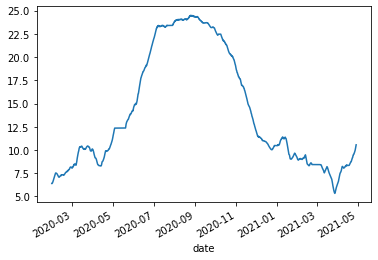

In [9]:
#Observe monthly trend
df.set_index('date')['average_temperature'].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='date'>

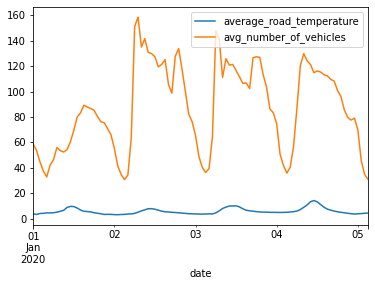

In [10]:
df.set_index('date')[:100][['average_road_temperature', 'avg_number_of_vehicles']].plot()

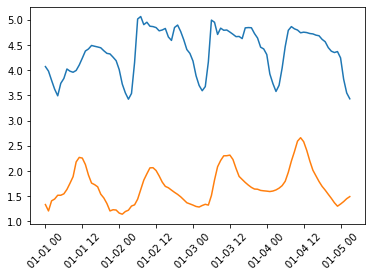

In [11]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_road_temperature']))
plt.xticks(rotation=45)
plt.show()

In [12]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

<AxesSubplot:xlabel='hour'>

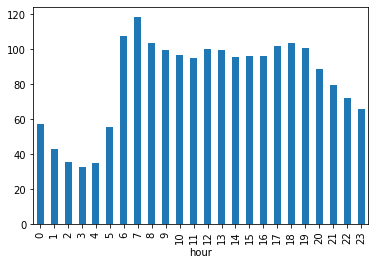

In [13]:
df.groupby('hour').avg_number_of_vehicles.mean().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

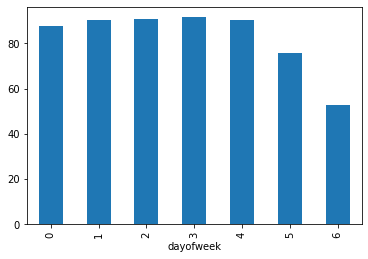

In [14]:
df.groupby('dayofweek').avg_number_of_vehicles.mean().plot(kind='bar')

In [15]:
df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()

dayofweek  hour
0          0       51.543226
           1       41.520968
           2       35.451452
           3       32.311935
           4       35.250000
                     ...    
6          19      60.421587
           20      58.346667
           21      61.922742
           22      60.218871
           23      58.974667
Name: avg_number_of_vehicles, Length: 168, dtype: float64

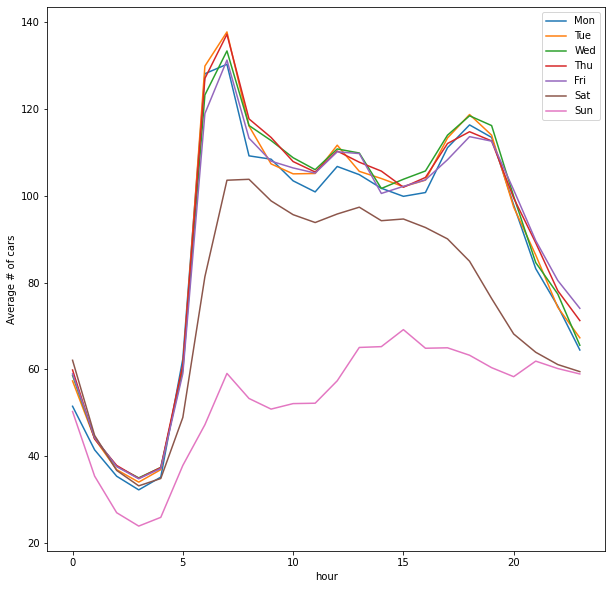

In [16]:
plt.figure(figsize=(10,10))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, dayname in enumerate(days):
    df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()[i].plot(label=dayname)
plt.ylabel('Average # of cars')
plt.legend()
plt.show();

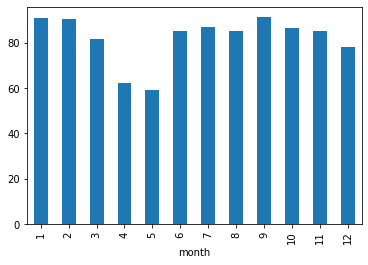

In [17]:
df.query('date < 2021').groupby('month').avg_number_of_vehicles.mean().plot(kind='bar')
plt.show()

### Time Series Prediction

In [18]:
df.columns

Index(['max_number_of_vehicles', 'minimum_speed', 'min_number_of_vehicles',
       'average_speed', 'avg_number_of_vehicles', 'maximum_speed', 'date',
       'average_felt_temperature', 'average_road_temperature',
       'minimum_felt_temperature', 'minimum_precipitation', 'maximum_humidity',
       'maximum_felt_temperature', 'maximum_precipitation',
       'maximum_temperature', 'average_humidity', 'average_wind',
       'average_directionofwind', 'minimum_temperature', 'average_temperature',
       'maximum_road_temperature', 'minimum_humidity',
       'minimum_directionofwind', 'minimum_wind', 'maximum_directionofwind',
       'minimum_road_temperature', 'maximum_wind', 'average_precipitation',
       'month', 'dayofweek', 'hour'],
      dtype='object')

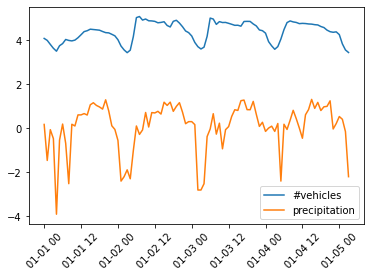

In [19]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_precipitation']))
plt.xticks(rotation=45)
plt.legend(['#vehicles','precipitation'])
plt.show()

In [20]:
ts = df.set_index('date').copy()
ts.interpolate(inplace=True)

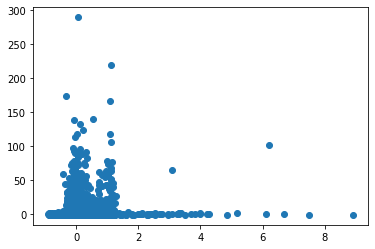

In [21]:
num_veh_change = ts['avg_number_of_vehicles'].pct_change()
avg_precip = ts['average_precipitation'].pct_change()
num_veh_change.shape, avg_precip.shape
plt.scatter(num_veh_change, avg_precip);

# ARIMA MODEL

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
* q --> Order of MA (moving average term) -
* d --> Order of Differencing (to make the series stationary)

### Check if Stationary

* Mean and variance seems to change over time

In [22]:
temperature = df.groupby(df['date'].dt.date)['average_temperature'].mean()

<AxesSubplot:xlabel='date'>

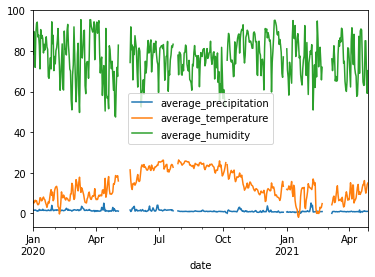

In [23]:
df[['date', 'average_precipitation', 'average_temperature', 'average_humidity']].set_index('date').resample(rule='D').mean().plot()

In [24]:
temperature.shape

(445,)

In [25]:
temperature = df[['date', 'average_temperature']].set_index('date').resample(rule='D').mean()

In [26]:
temperature

,average_temperature
date,
2020-01-01,5.669583
2020-01-02,5.067917
2020-01-03,5.444167
2020-01-04,6.459583
2020-01-05,5.793750
...,...
2021-04-24,12.346667
2021-04-25,9.944583
2021-04-26,11.520833


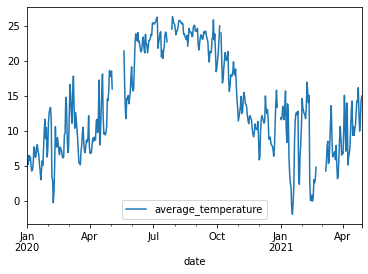

In [27]:
temperature.plot();

In [28]:
full_range = set(pd.date_range('2020-01-01', '2021-04-28'))
df_dates = set(df['date'])
missing_days = full_range.difference(df_dates)
missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)
missing_days.values

array(['2020-02-21T00:00:00.000000000', '2020-05-04T00:00:00.000000000',
       '2020-05-05T00:00:00.000000000', '2020-05-06T00:00:00.000000000',
       '2020-05-07T00:00:00.000000000', '2020-05-08T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000', '2020-05-10T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2020-05-12T00:00:00.000000000',
       '2020-05-13T00:00:00.000000000', '2020-05-14T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-05-16T00:00:00.000000000',
       '2020-05-17T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-07-22T00:00:00.000000000',
       '2020-07-23T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-25T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-28T00:00:00.000000000',
       '2020-10-06T00:00:00.000000000', '2020-10-07T00:00:00.000000000',
       '2020-10-08T00:00:00.000000000', '2020-11-06

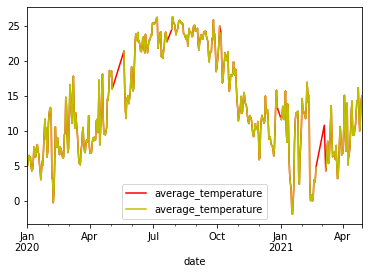

In [29]:
temp2 = temperature.interpolate()
ax = temp2.plot(c='r')
temperature.plot(c='y', ax=ax)
plt.title
plt.show()

In [30]:
temperature = temperature.interpolate()

In [31]:
#Test if stationary (Dicky Fuller test) - h0: Time series data is not stationary
from statsmodels.tsa.stattools import adfuller
results = adfuller(temperature)

In [32]:
print("h0: Time series data is not stationary")
print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")

h0: Time series data is not stationary
Test Statistic: -2.0281931865427634
P-Value: 0.27434979399070736
Critical Test stats for intervals: {'1%': -3.4441920863262863, '5%': -2.8676439813617147, '10%': -2.570021186703601}



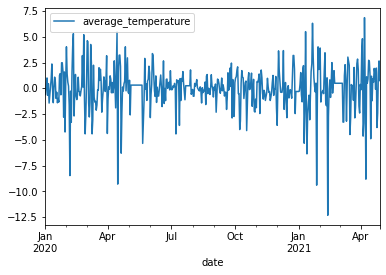

In [33]:
diff1 = temperature.diff()
diff1.plot();

In [34]:
results = adfuller(diff1.dropna())
print("h0: Time series data is not stationary")
print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")

h0: Time series data is not stationary
Test Statistic: -11.135671215356485
P-Value: 3.200011816491209e-20
Critical Test stats for intervals: {'1%': -3.4441920863262863, '5%': -2.8676439813617147, '10%': -2.570021186703601}



In [35]:
from pmdarima.arima.utils import ndiffs
ndiffs(temperature, test='adf')

1

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


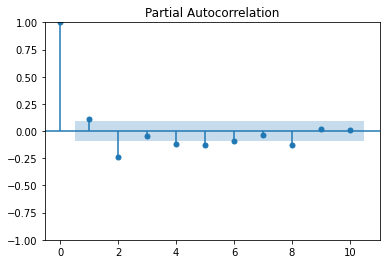

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(diff1.dropna(), lags=10);

In [51]:
ser = diff1.dropna().iloc[:,0]
ar0 = ser.corr(ser)
ar1 = ser.corr(ser.shift().dropna())
ar2 = ser.corr(ser.shift().shift())
ar0, ar1, ar2

(0.9999999999999998, 0.11029184637709001, -0.22224541379402002)

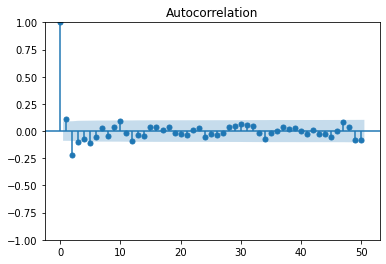

In [38]:
plot_acf(diff1.dropna().reset_index(drop=True), lags=50);

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model = ARIMA(ser, order=(2,1,2))
model = model.fit()
print(model.summary())

                                SARIMAX Results                                
Dep. Variable:     average_temperature   No. Observations:                  483
Model:                  ARIMA(2, 1, 2)   Log Likelihood               -1010.594
Date:                 Sun, 03 Apr 2022   AIC                           2031.187
Time:                         22:29:26   BIC                           2052.077
Sample:                     01-02-2020   HQIC                          2039.397
                          - 04-28-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9711      0.043     22.509      0.000       0.887       1.056
ar.L2         -0.2451      0.041     -5.969      0.000      -0.326      -0.165
ma.L1         -1.9370      0.026    -75.533 

In [38]:
import matplotlib.pyplot as plt

## DECOMPOSITION

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
results = seasonal_decompose(temperature,period=180)

<Figure size 500x500 with 0 Axes>

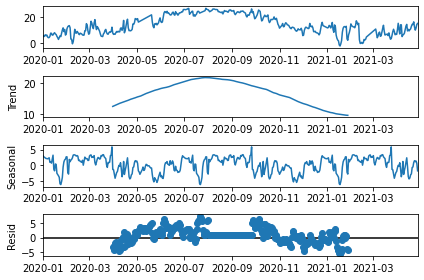

In [57]:
plt.figure(figsize=(100,100), dpi=5)
results.plot();

https://app.datacamp.com/learn/courses/time-series-analysis-in-python

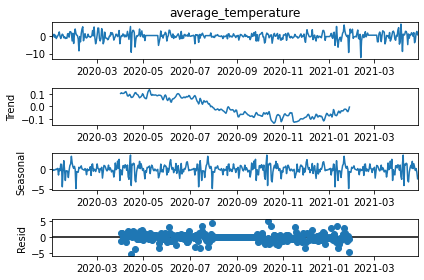

In [60]:
seasonal_decompose(ser,period=180).plot();